In [1]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [2]:
t_ones = torch.ones(2, 3)
print(t_ones)
print(t_ones.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.Size([2, 3])


In [3]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.2389, 0.7940, 0.5293],
        [0.9716, 0.6014, 0.0534]])


In [4]:
t_a_new = t_a.to(torch.int64)
t_a_new.dtype

torch.int64

# Transposing a tensor:

In [5]:
t = torch.rand(3, 5)
t

tensor([[0.4981, 0.4192, 0.3670, 0.8035, 0.7575],
        [0.6181, 0.7450, 0.3755, 0.5467, 0.5062],
        [0.7279, 0.4272, 0.2700, 0.8034, 0.3488]])

In [6]:
t_tr = torch.transpose(t, 0, 1)
print(t.shape, '-->', t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [7]:
t_tr

tensor([[0.4981, 0.6181, 0.7279],
        [0.4192, 0.7450, 0.4272],
        [0.3670, 0.3755, 0.2700],
        [0.8035, 0.5467, 0.8034],
        [0.7575, 0.5062, 0.3488]])

# Reshaping a tensor (for example, from a 1D vector to a 2D array):

In [8]:
t = torch.zeros(20)
t

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
t_reshape = t.reshape(4, 5)
t_reshape

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

# Removing the unnecessary dimensions 
# (dimensions that have size 1, which are not needed):

In [10]:
t = torch.zeros(1, 2, 1, 4, 1)
t

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])

In [11]:
t_sqz = torch.squeeze(t, 2)
t_sqz

tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])

In [12]:
print(t.shape, '-->', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [13]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
print(t1)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])


In [14]:
t2 = torch.normal(mean=0, std=1, size=(5, 2))
t2

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

In [15]:
# compute the element-wise product of t1 and t2
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [16]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [17]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [18]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [19]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


# Split, stack, and concatenate tensors

In [20]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [21]:
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [22]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [23]:
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [24]:
A = torch.ones(3)
A

tensor([1., 1., 1.])

In [25]:
B = torch.zeros(2)
B

tensor([0., 0.])

In [26]:
C = torch.cat([A, B], axis=0)
C

tensor([1., 1., 1., 0., 0.])

In [27]:
A = torch.ones(3)
A

tensor([1., 1., 1.])

In [28]:
B = torch.zeros(3)
B

tensor([0., 0., 0.])

In [29]:
S = torch.stack([A, B], axis=1)
S

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

# Building input pipelines in PyTorch

In [30]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [31]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [32]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

from torch.utils.data import Dataset


class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    

joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


# Shuffle, batch, and repeat

In [33]:
joint_dataset = JointDataset(t_x, t_y)

torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
          '\n         y:', batch[1])
    


batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


In [34]:
for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n          y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
          y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
          y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
          y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
          y: tensor([0, 1])


In [35]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat_01.jpg', 'cat_dog_images\\cat_02.jpg', 'cat_dog_images\\cat_03.jpg', 'cat_dog_images\\dog_01.jpg', 'cat_dog_images\\dog_02.jpg', 'cat_dog_images\\dog_03.jpg']


Image shape: (101, 134, 3)
Image shape: (102, 134, 3)
Image shape: (101, 84, 3)
Image shape: (89, 133, 3)
Image shape: (88, 132, 3)
Image shape: (99, 134, 3)


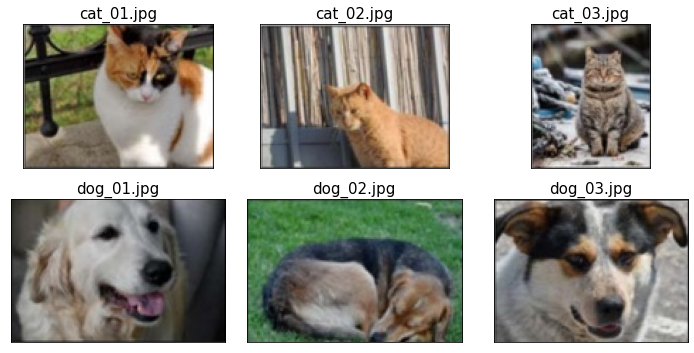

In [36]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [37]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [38]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)
    
    
image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
    print(file, label)
    

cat_dog_images\cat_01.jpg 0
cat_dog_images\cat_02.jpg 0
cat_dog_images\cat_03.jpg 0
cat_dog_images\dog_01.jpg 1
cat_dog_images\dog_02.jpg 1
cat_dog_images\dog_03.jpg 1


# apply transformations to this dataset

In [39]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

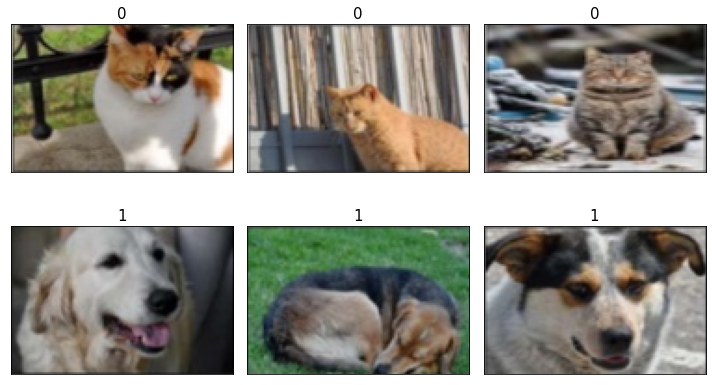

In [40]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    

image_dataset = ImageDataset(file_list, labels, transform)
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()
        

In [41]:
import torchvision

image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
#     image_path, split='train', target_type='attr', download=True)
    image_path, split='train', target_type='attr', download=False)

RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [42]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

example = next(iter(celeba_dataset))
print(example)

NameError: name 'celeba_dataset' is not defined

In [43]:
from itertools import islice

fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
plt.show()

NameError: name 'celeba_dataset' is not defined

<Figure size 864x576 with 0 Axes>

In [44]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train',
                                           download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)


(<PIL.Image.Image image mode=L size=28x28 at 0x28521261100>, 5)


c:\users\robert\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [45]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot([])
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.show()
    

ValueError: Single argument to subplot must be a three-digit integer, not []

<Figure size 1080x432 with 0 Axes>

# Building a linear regression model

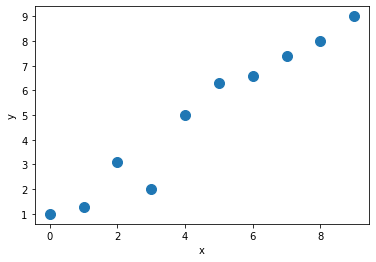

In [46]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))

y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6, 7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [56]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

def loss_fn(input, target):
    return (input-target).pow(2).mean()


learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 46.5720
Epoch 10  Loss 27.1502
Epoch 20  Loss 1.6446
Epoch 30  Loss 14.4571
Epoch 40  Loss 11.7827
Epoch 50  Loss 6.4122
Epoch 60  Loss 0.6339
Epoch 70  Loss 3.1562
Epoch 80  Loss 2.0100
Epoch 90  Loss 0.3107
Epoch 100  Loss 0.7625
Epoch 110  Loss 1.0024
Epoch 120  Loss 0.0232
Epoch 130  Loss 0.5138
Epoch 140  Loss 0.0741
Epoch 150  Loss 1.8712
Epoch 160  Loss 0.0007
Epoch 170  Loss 0.0850
Epoch 180  Loss 0.0634
Epoch 190  Loss 0.0012


In [57]:
print('Final Parameters:', weight.item(), bias.item())

Final Parameters: 2.670930862426758 4.88258695602417


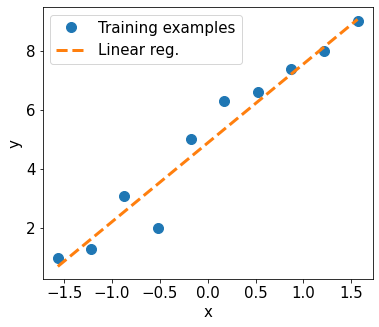

In [58]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Model training via the torch.nn and torch.optim modules

In [60]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0]
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss{loss.item():.4f}')
        
print('Final Parameters:', model.weight.item(), model.bias.item())


Epoch 0  Loss24.6684
Epoch 10  Loss29.1377
Epoch 20  Loss20.9207
Epoch 30  Loss0.1257
Epoch 40  Loss12.4922
Epoch 50  Loss1.7845
Epoch 60  Loss7.6425
Epoch 70  Loss2.5606
Epoch 80  Loss0.0157
Epoch 90  Loss0.7548
Epoch 100  Loss0.8412
Epoch 110  Loss0.4923
Epoch 120  Loss0.0823
Epoch 130  Loss0.0794
Epoch 140  Loss0.0891
Epoch 150  Loss0.0973
Epoch 160  Loss0.1043
Epoch 170  Loss0.1103
Epoch 180  Loss0.0009
Epoch 190  Loss0.0764
Final Parameters: 2.6496422290802 4.87706995010376


# Building a multilayer perceptron for classifying flowers in...

In [92]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

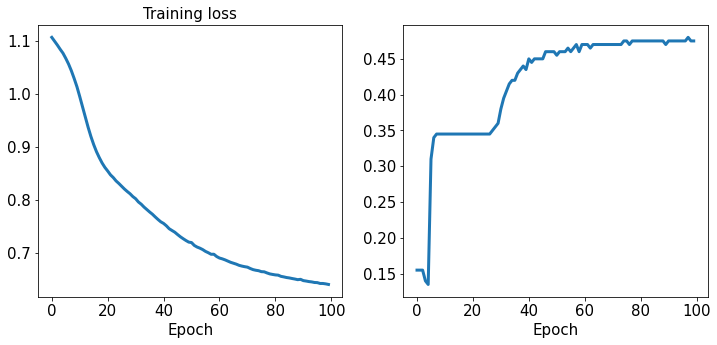

In [93]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        y_batch = y_batch.type(torch.LongTensor)
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Evaluating the trained model on the test dataset

In [100]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

TypeError: expected np.ndarray (got Tensor)